## Mini Project III

In [615]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# set figure size
plt.rcParams["figure.figsize"] = (12,6)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize, StandardScaler, MinMaxScaler

### Based on demographics (only on the information from twm_customer) ### 

In [584]:
data = pd.read_csv("twm_customer.csv", delimiter=';')

In [585]:
data.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [586]:
#No Missing Values
data.isnull().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [587]:
data.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [588]:
data.shape

(747, 15)

In [589]:
#Convert from Categorical to Numerical using One-Hot Encoding - GENDER
gender_val = {"M ": 1, "F ":2}
data['gender_val'] = data["gender"].replace(gender_val)

In [590]:
#Convert from Categorical to Numerical using One-Hot Encoding - STATE CODE
state_code_val = {"AL  ":1, "AZ  ":2, "CA  ":3, "CO  ":4, "DC  ":5, "FL  ":6, "GA  ":7, "HI  ":8,
                 "IL  ":9, "IN  ":10, "KS  ":11, "KY  ":12, "LA  ":13, "MA  ":14, "MD  ":15, "MI  ":16,
                 "MN  ":17, "MO  ":18, "NB  ":19, "NC  ":20, "NJ  ":21, "NM  ":22, "NV  ":23, "NY  ":24,
                 "OH  ":25, "OK  ":26, "OR  ":27, "PA  ":28, "TN  ":29, "TX  ":30, "VA  ":31, "WA  ":32, "WI  ":33}
data['state_code_val'] = data["state_code"].replace(state_code_val)

In [591]:
data.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,gender_val,state_code_val
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,1,23
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,1,3
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,2,3
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,2,3
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,2,24


In [592]:
demo_data = data.drop(columns=['cust_id','years_with_bank','gender','name_prefix','first_name','last_name','street_nbr','street_name','postal_code','city_name','state_code'])

In [593]:
demo_data.head()

,income,age,nbr_children,marital_status,gender_val,state_code_val
0,26150,46,1,2,1,23
1,6605,71,0,2,1,3
2,18548,38,0,1,2,3
3,47668,54,0,1,2,3
4,44554,59,2,4,2,24


In [594]:
demo_data.describe()

,income,age,nbr_children,marital_status,gender_val,state_code_val
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,0.714859,1.882195,1.559572,15.970549
std,22207.221405,19.114879,1.103410,0.892051,0.496771,10.826152
min,0.000000,13.000000,0.000000,1.000000,1.000000,1.000000
25%,7118.500000,28.000000,0.000000,1.000000,1.000000,3.000000
50%,17242.000000,42.000000,0.000000,2.000000,2.000000,17.000000
75%,31338.000000,56.000000,1.000000,2.000000,2.000000,25.000000
max,144157.000000,89.000000,5.000000,4.000000,2.000000,33.000000


In [595]:
#Scale Data
ss = StandardScaler()
scaled_df = ss.fit_transform(demo_data)

In [596]:
#Scaling PCA Componenent
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)
components = pca.components_

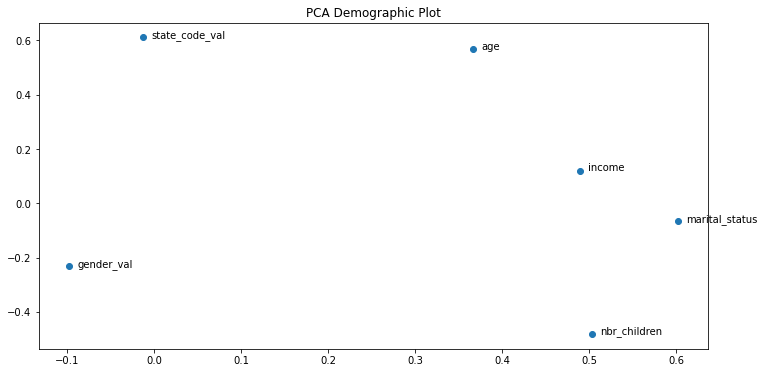

In [597]:
#PCA Scatter Plot
fig, ax = plt.subplots(1,1)
ax.set_title("PCA Demographic Plot")
ax.scatter(components[0], components[1])

for i, txt in enumerate(demo_data.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(8,0), textcoords='offset points')
    
fig.savefig('PCA_components')

In [598]:
#For each k value, initialise k-means athen use the inertia attribute 
#and identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)

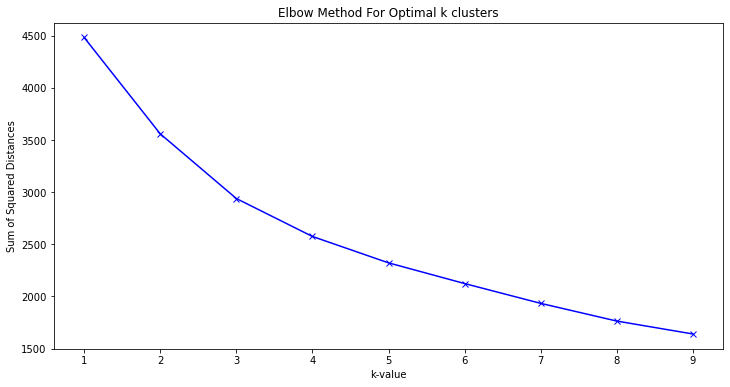

In [599]:
#The elbow indicating the optimal K (clusters) for this dataset.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k-value')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k clusters')
plt.show()

#### As per above method, the optimal number of clusters K is 3 ####

In [610]:
kmeans = KMeans(n_clusters=3).fit(scaled_df)
k_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.51607368 -0.11581252  1.35918386  0.88906674  0.01689946 -0.14714136]
 [ 0.14655899  0.88828641 -0.46334039  0.0583486  -0.04711038  0.21738059]
 [-0.63656164 -1.0387413  -0.5870734  -0.84761909  0.04573952 -0.15093916]]


In [611]:
new_columns = kmeans.predict(scaled_df)
new_cols = pd.DataFrame(new_columns)

In [601]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

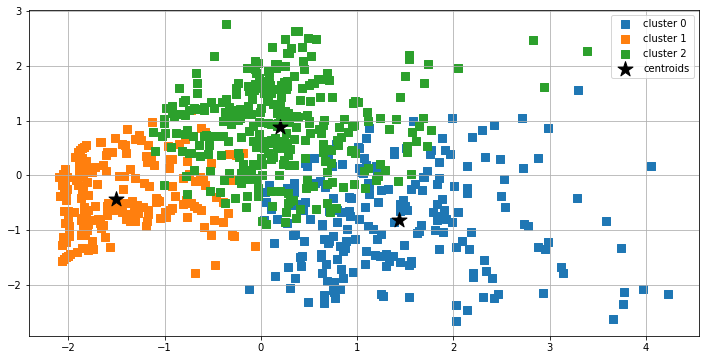

In [602]:
plot_clusters(X_pca, k_labels,plt_cluster_centers = True)

#### Plot Radar Chart using - Plotly ####

In [620]:
minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(demo_data)
new_df = pd.DataFrame(minmax_df, columns=demo_data.columns.to_list())

In [617]:
final_df = pd.concat([new_df, new_cols], axis=1)
final_df.rename(columns={0:'cluster'}, inplace=True)

In [618]:
clusters = []
cluster_list = final_df['cluster'].unique().tolist()
cluster_list.sort()

for i in cluster_list:
    clusters.append(final_df[
                        final_df['cluster'] == i
                    ])

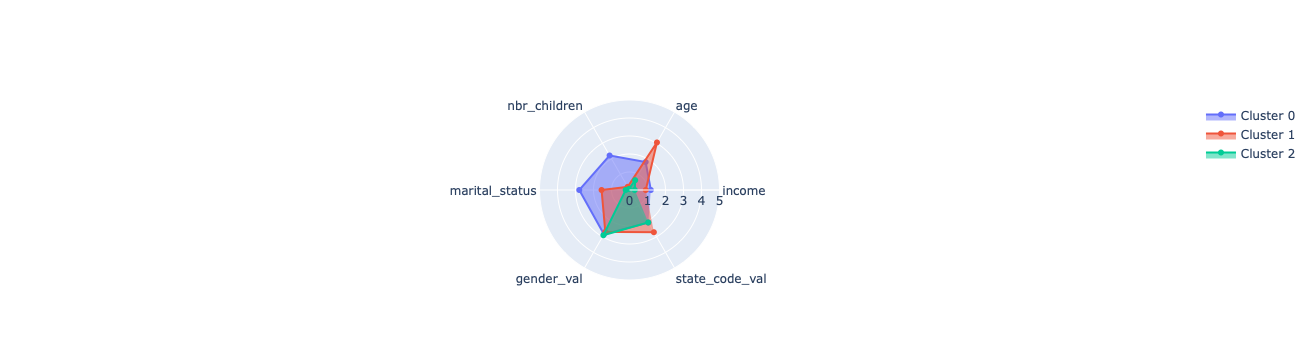

In [623]:
import plotly.graph_objects as go

categories = final_df.columns.to_list()
categories.remove('cluster')

fig = go.Figure()

for cluster in clusters:
    #R computation
    r = []
    for i in categories:
        r.append(cluster[i].mean())
        
    fig.add_trace(go.Scatterpolar(
        r=r,
        theta=categories,
        fill='toself', name=f'Cluster {cluster.iloc[0,-1]}'))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.write_html("radar.html")

fig.show()

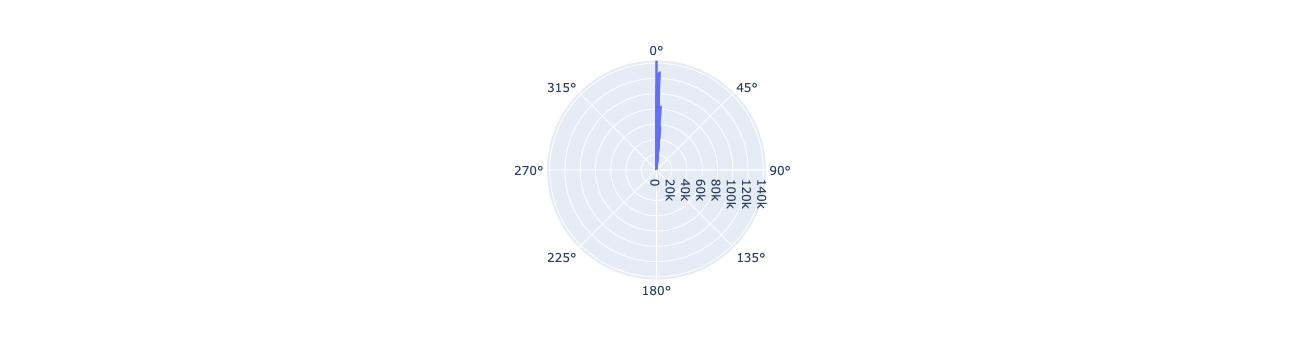

In [622]:
#Income Vs Number of Children
fig = px.line_polar(demo_data, r='income', theta='nbr_children', line_close=True)
fig.show()

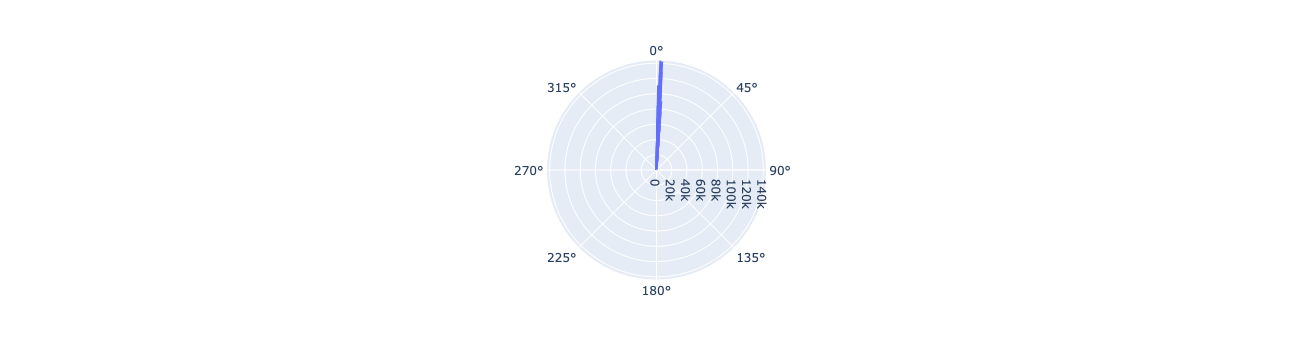

In [568]:
#Income Vs Martial status (1,2,3,4)
fig = px.line_polar(demo_data, r='income', theta='marital_status', line_close=True)
fig.show()

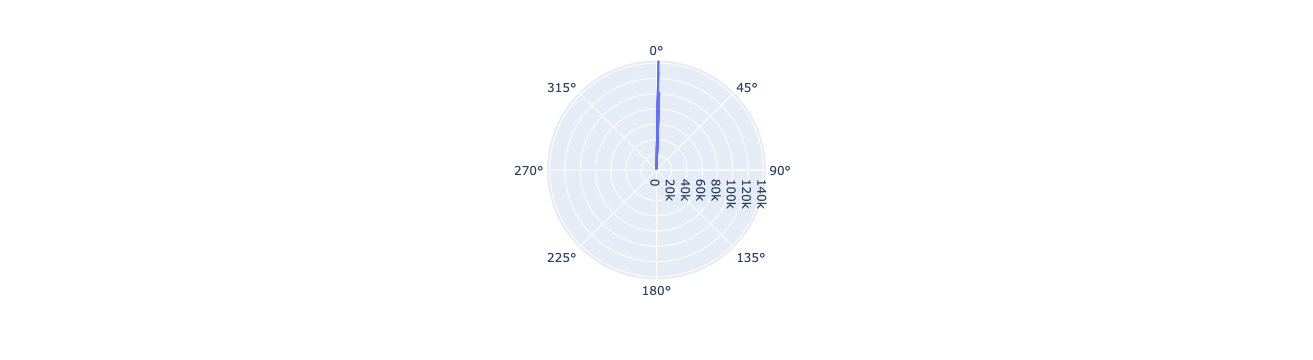

In [569]:
#Income Vs Gender val (1,2)
fig = px.line_polar(demo_data, r='income', theta='gender_val', line_close=True)
fig.show()

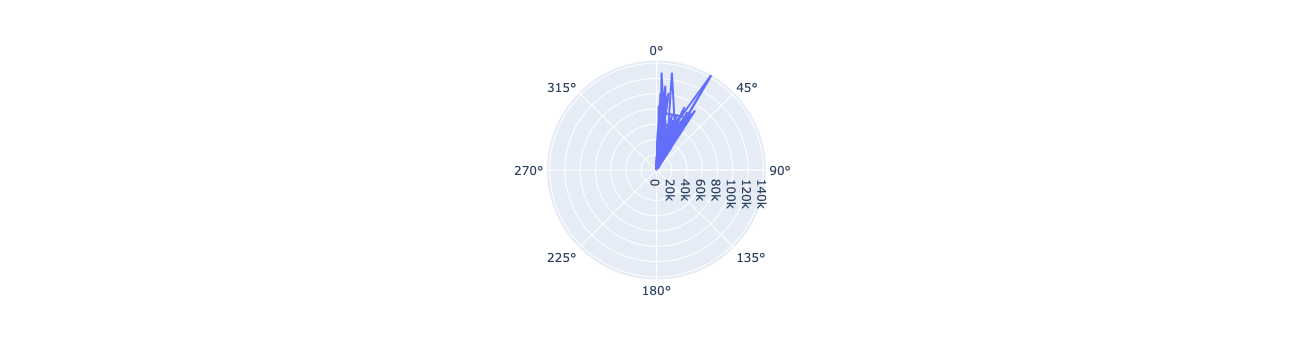

In [570]:
#Income Vs State Domicile
fig = px.line_polar(demo_data, r='income', theta='state_code_val', line_close=True)
fig.show()

#### Income and Age Example ####

In [571]:
def plot_clusters_simple(df_column):
    plt.scatter(df_column.iloc[:,0], df_column.iloc[:,1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='*')
    plt.xlabel('Income($)')
    plt.ylabel('Age')
    plt.show()

In [572]:
#Income and Age Example
demo_kmean = demo_data[['income','age']]
#Scale Data
ss = StandardScaler()
scaled_df = ss.fit_transform(demo_kmean)
#Scaling PCA Componenent
pca = PCA(n_components=2)
X_pca = pca.fit_transform(demo_kmean)
components = pca.components_
kmeans = KMeans(n_clusters=3).fit(demo_kmean)
k_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

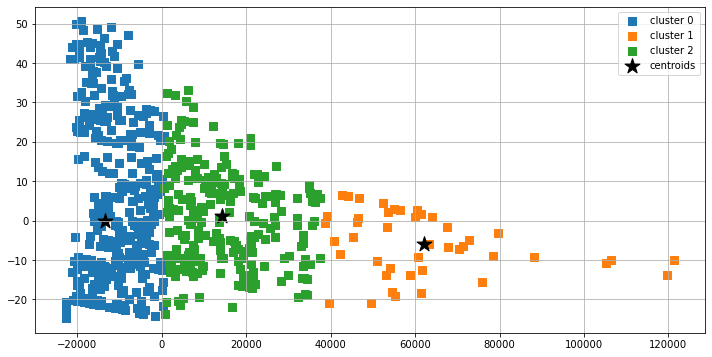

In [573]:
#Income and Age Plot
plot_clusters(X_pca, k_labels, plt_cluster_centers=True)

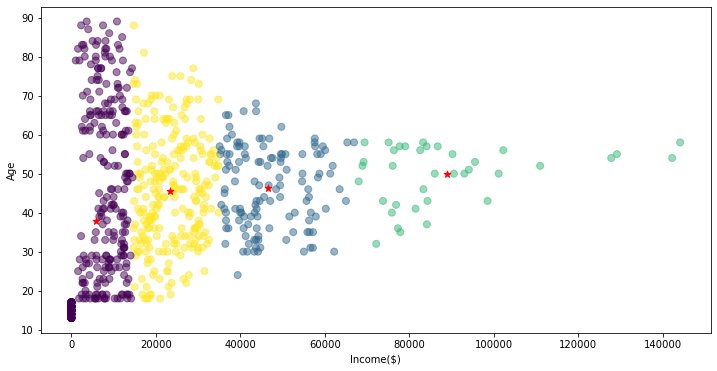

In [574]:
#Income and Age Example
kmeans = KMeans(n_clusters=4).fit(demo_kmean)
centroids = kmeans.cluster_centers_
plot_clusters_simple(demo_kmean)

In [575]:
demo_data['income'].describe()

count       747.000000
mean      22728.281124
std       22207.221405
min           0.000000
25%        7118.500000
50%       17242.000000
75%       31338.000000
max      144157.000000
Name: income, dtype: float64

In [576]:
demo_data['age'].describe()

count    747.000000
mean      42.479250
std       19.114879
min       13.000000
25%       28.000000
50%       42.000000
75%       56.000000
max       89.000000
Name: age, dtype: float64

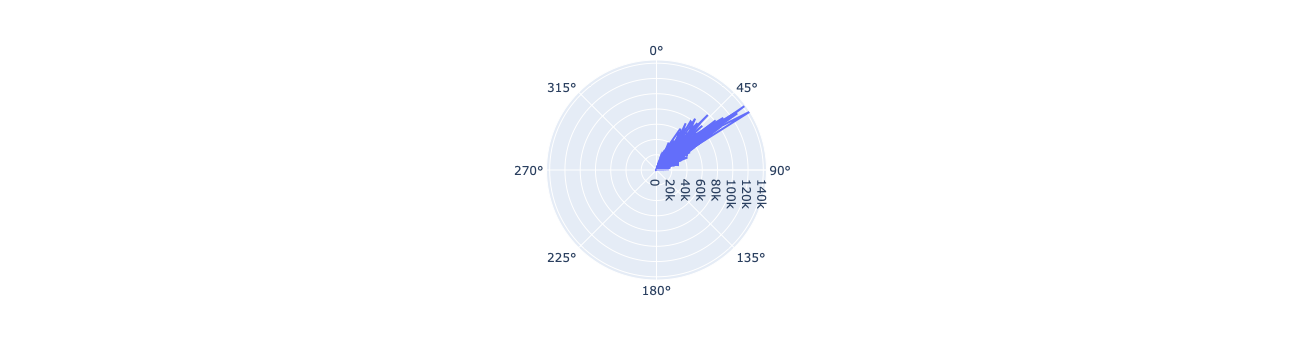

In [577]:
fig = px.line_polar(demo_kmean, r='income', theta='age', line_close=True)
fig.show()